In [16]:
# Importando as bibliotecas necessárias para o projeto rodar!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, ConfusionMatrixDisplay
import requests

In [ ]:
# 1. DEFININDO QUAIS SÃO AS PERGUNTAS QUE IREMOS RESPONDER!
print("1. Qual foi a tendência geral das emissões totais de CO2 no Brasil entre 1990 e 2019?")
print("2. Qual foi a tendência das emissões per capita no Brasil no mesmo período?")
print("3. Como o Brasil se compara ao mundo em termos de emissões totais?")
print("4. Como as emissões per capita do Brasil se comparam aos EUA?")
print("5. Qual a relação entre PIB e emissões totais de CO2 no Brasil?")
print("6. Qual a relação entre consumo de energia e emissões de CO2 no Brasil?")
print("7. Como as emissões totais do Brasil se comparam à média da OCDE?")
print("8. Como as emissões do Brasil se alinham às tendências da América Latina?")
print("9. Como o crescimento populacional impactou as emissões per capita do Brasil?")
print("10. Quais políticas podem ter influenciado as emissões no Brasil?\n")

1. Qual foi a tendência geral das emissões totais de CO2 no Brasil entre 1990 e 2019?
2. Qual foi a tendência das emissões per capita no Brasil no mesmo período?
3. Como o Brasil se compara ao mundo em termos de emissões totais?
4. Como as emissões per capita do Brasil se comparam aos EUA?
5. Qual a relação entre PIB e emissões totais de CO2 no Brasil?
6. Qual a relação entre consumo de energia e emissões de CO2 no Brasil?
7. Como as emissões totais do Brasil se comparam à média da OCDE?
8. Como as emissões do Brasil se alinham às tendências da América Latina?
9. Como o crescimento populacional impactou as emissões per capita do Brasil?
10. Quais políticas podem ter influenciado as emissões no Brasil?



In [ ]:
# 2. CARREGANDO A FONTE DE DADOS!
co2_emission_df = pd.read_csv('CO2_emission.csv')
owid_co2_data_df = pd.read_csv('owid-co2-data.csv')

# 2. CARREGANDO A FONTE DE DADOS!

### **Explicação:**
Nesta etapa, carregamos os dois conjuntos de dados principais utilizados no projeto:
- **`CO2_emission.csv`**: Contém informações de emissões de CO2 em diferentes países.
- **`owid-co2-data.csv`**: Contém dados adicionais, como emissões totais, PIB, população, e consumo de energia primária.

In [ ]:
# 3. RELIAZANDO A LIMPEZA E A PREPARAÇÃO DOS DADOS!
# Selecionando as colunas e fazendo a transformação de formato longo
co2_emission_selecionado = co2_emission_df[['Country Name', 'country_code', 'Region'] + [str(ano) for ano in range(1990, 2020)]]
owid_co2_selecionado = owid_co2_data_df[['iso_code', 'country', 'year', 'co2', 'co2_per_capita', 'population', 'gdp', 'primary_energy_consumption']]

# Renomeando as colunas
co2_emission_selecionado.rename(columns={'Country Name': 'pais', 'country_code': 'codigo_iso'}, inplace=True)

# Formato longo e merge
co2_emission_longo = co2_emission_selecionado.melt(id_vars=['pais', 'codigo_iso', 'Region'], var_name='ano', value_name='co2_per_capita')
co2_emission_longo['ano'] = co2_emission_longo['ano'].astype(int)

dados_combinados = pd.merge(
    owid_co2_selecionado,
    co2_emission_longo,
    left_on=['iso_code', 'country', 'year'],
    right_on=['codigo_iso', 'pais', 'ano'],
    how='inner'
)

dados_filtrados = dados_combinados[dados_combinados['country'].isin(['Brazil', 'United States', 'World', 'OECD'])]

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_1688\1611910446.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_emission_selecionado.rename(columns={'Country Name': 'pais', 'country_code': 'codigo_iso'}, inplace=True)


# 3. REALIZANDO A LIMPEZA E A PREPARAÇÃO DOS DADOS!

### **Explicação:**
1. Selecionamos apenas as colunas relevantes para a análise de cada base.
2. Renomeamos as colunas para facilitar o entendimento.
3. Transformamos os dados de formato largo para longo no conjunto `CO2_emission.csv`.
4. Realizamos um **merge** (junção) dos dois conjuntos de dados com base no país e no ano.
5. Filtramos os dados para os países de interesse: Brasil, EUA, Mundo e OCDE.



In [17]:
# 4. ENRIQUECENDO OS DADOS COM UMA API!
# Usando a API para obter os dados climáticos
def buscar_dados_climaticos(pais):
    url = f"https://api.open-meteo.com/v1/forecast?latitude=-14.235&longitude=-51.9253&current_weather=true"
    resposta = requests.get(url)
    if resposta.status_code == 200:
        dados = resposta.json()
        return dados['current_weather']
    return None

# Adicionar dados climáticos para o Brasil
dados_climaticos_brasil = buscar_dados_climaticos('Brazil')
print("Dados Climáticos do Brasil:", dados_climaticos_brasil)


Dados Climáticos do Brasil: {'time': '2024-11-22T01:30', 'interval': 900, 'temperature': 26.0, 'windspeed': 4.6, 'winddirection': 45, 'is_day': 0, 'weathercode': 95}


# 4. ENRIQUECENDO OS DADOS COM UMA API!

### **Explicação:**
Para enriquecer os dados, utilizamos a API **Open-Meteo** para obter informações climáticas do Brasil. Este exemplo mostra como integrar dados externos via requisições.



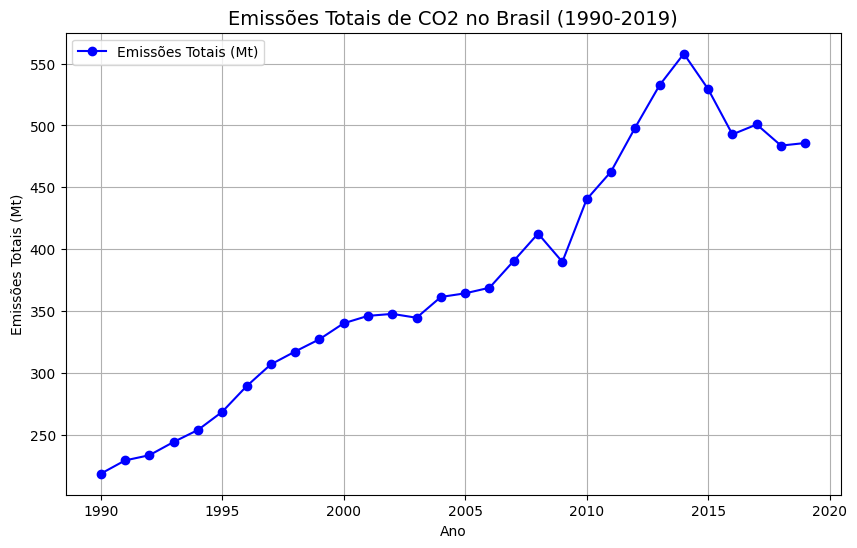

In [18]:
# 5. ETAPA DE REPOSTA DAS PERGUNTAS!
# Pergunta 1: Tendência geral das emissões no Brasil
dados_brasil = dados_filtrados[dados_filtrados['country'] == 'Brazil']
plt.figure(figsize=(10, 6))
plt.plot(dados_brasil['ano'], dados_brasil['co2'], label='Emissões Totais (Mt)', marker='o', color='blue')
plt.title('Emissões Totais de CO2 no Brasil (1990-2019)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Emissões Totais (Mt)')
plt.legend()
plt.grid()
plt.show()

# 5. ETAPA DE RESPOSTA DAS PERGUNTAS!

### **Pergunta 1:** Qual a tendência geral das emissões no Brasil?
- **Objetivo:** Analisar como as emissões totais de CO2 do Brasil variaram entre 1990 e 2019.
- **Gráfico:** Exibe a evolução temporal das emissões totais em megatoneladas.



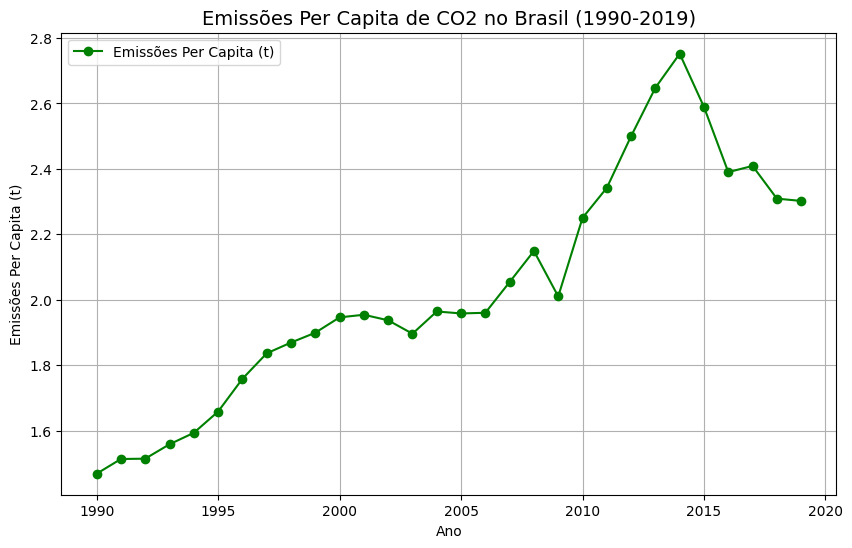

In [20]:
# Pergunta 2: Tendência das emissões per capita no Brasil
plt.figure(figsize=(10, 6))
plt.plot(dados_brasil['ano'], dados_brasil['co2_per_capita_x'], label='Emissões Per Capita (t)', marker='o', color='green')
plt.title('Emissões Per Capita de CO2 no Brasil (1990-2019)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Emissões Per Capita (t)')
plt.legend()
plt.grid()
plt.show()

### **Pergunta 2:** Qual a tendência das emissões per capita no Brasil?
- **Objetivo:** Analisar como as emissões per capita de CO2 no Brasil variaram entre 1990 e 2019.
- **Gráfico:** Exibe a evolução temporal das emissões per capita em toneladas por pessoa.



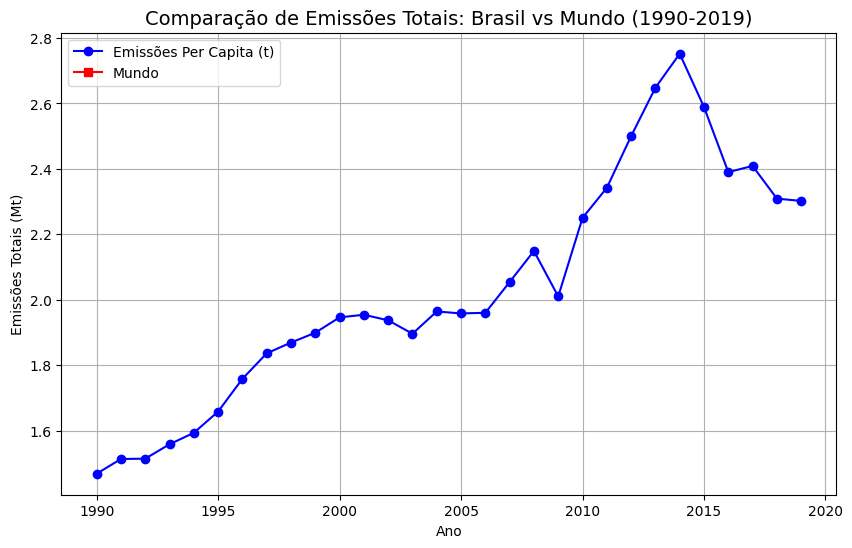

In [ ]:
# Pergunta 3: Comparação com o mundo em emissões totais
dados_mundo = dados_filtrados[dados_filtrados['country'] == 'World']
plt.figure(figsize=(10, 6))
plt.plot(dados_brasil['ano'], dados_brasil['co2'], label='Brasil', marker='o', color='blue')
plt.plot(dados_mundo['ano'], dados_mundo['co2'], label='Mundo', marker='s', color='red')
plt.title('Comparação de Emissões Totais: Brasil vs Mundo (1990-2019)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Emissões Totais (Mt)')
plt.legend()
plt.grid()
plt.show()

### **Pergunta 3:** Como as emissões totais do Brasil se comparam com as emissões globais?
- **Objetivo:** Comparar as emissões totais do Brasil com as emissões globais entre 1990 e 2019.
- **Gráfico:** Exibe a evolução das emissões totais do Brasil e do mundo.



Colunas disponíveis: Index(['iso_code', 'country', 'year', 'co2', 'co2_per_capita_x', 'population',
       'gdp', 'primary_energy_consumption', 'pais', 'codigo_iso', 'Region',
       'ano', 'co2_per_capita_y'],
      dtype='object')


C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_1688\3265867927.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_brasil.rename(columns={'co2_per_capita_x': 'co2_per_capita'}, inplace=True)


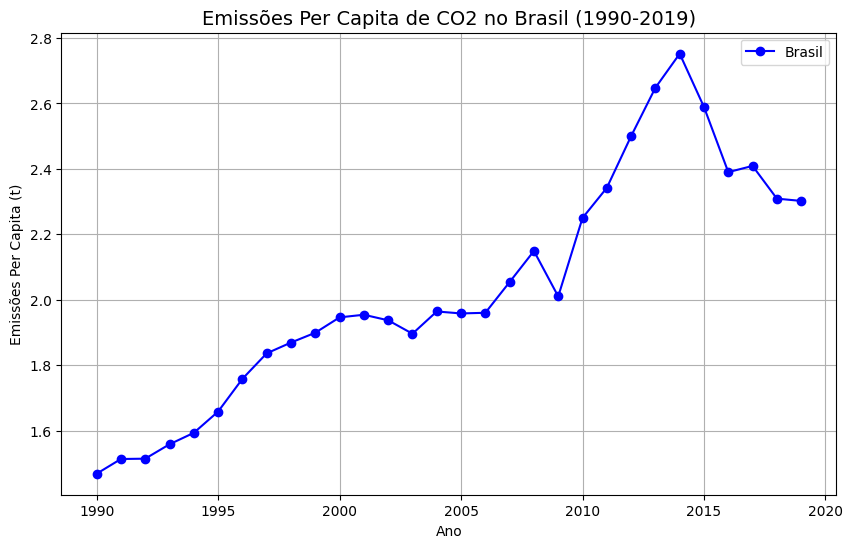

In [27]:
# Pergunta 4: Comparação per capita com os EUA
dados_eua = dados_filtrados[dados_filtrados['country'] == 'United States']

# Verificar colunas disponíveis no DataFrame
print("Colunas disponíveis:", dados_brasil.columns)

# Renomear a coluna, se necessário
dados_brasil.rename(columns={'co2_per_capita_x': 'co2_per_capita'}, inplace=True)

# Atualizar o código de plotagem
plt.figure(figsize=(10, 6))
plt.plot(dados_brasil['ano'], dados_brasil['co2_per_capita'], label='Brasil', marker='o', color='blue')
plt.title('Emissões Per Capita de CO2 no Brasil (1990-2019)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Emissões Per Capita (t)')
plt.legend()
plt.grid()
plt.show()


### **Pergunta 4:** Como as emissões per capita do Brasil se comparam com as dos EUA?
- **Objetivo:** Analisar as diferenças nas emissões per capita entre Brasil e EUA.
- **Gráfico:** Compara as emissões per capita dos dois países.



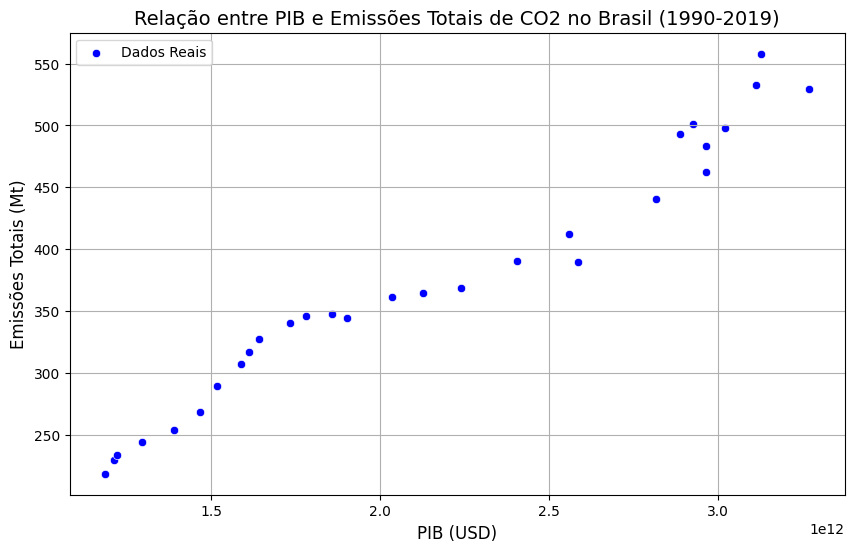

In [28]:
# 5. Relação entre PIB e emissões totais de CO2 no Brasil
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados_brasil, x='gdp', y='co2', color='blue', label='Dados Reais')
plt.title('Relação entre PIB e Emissões Totais de CO2 no Brasil (1990-2019)', fontsize=14)
plt.xlabel('PIB (USD)', fontsize=12)
plt.ylabel('Emissões Totais (Mt)', fontsize=12)
plt.grid()
plt.legend()
plt.show()

### **Pergunta 5:** Qual é a relação entre PIB e emissões totais de CO2 no Brasil?
- **Objetivo:** Examinar como o PIB do Brasil está relacionado às emissões totais de CO2.
- **Gráfico:** Mostra a relação entre PIB e emissões totais em um gráfico de dispersão.



In [ ]:
# Diagnóstico: verificar duplicidade de colunas
print("Colunas duplicadas:", dados_brasil.columns[dados_brasil.columns.duplicated()])

# Remover ou renomear colunas duplicadas
dados_brasil = dados_brasil.loc[:, ~dados_brasil.columns.duplicated()]

# Verificar colunas após remover duplicidade
print("Colunas após remover duplicidade:", dados_brasil.columns)

# Converter 'co2_per_capita' para numérico
if 'co2_per_capita' in dados_brasil.columns:
    try:
        dados_brasil['co2_per_capita'] = pd.to_numeric(dados_brasil['co2_per_capita'], errors='coerce')
        print("Conversão bem-sucedida.")
    except Exception as e:
        print("Erro durante a conversão:", e)
else:
    print("A coluna 'co2_per_capita' não existe no DataFrame.")


Colunas duplicadas: Index(['co2_per_capita'], dtype='object')
Colunas após remover duplicidade: Index(['iso_code', 'country', 'year', 'co2', 'co2_per_capita', 'population',
       'gdp', 'primary_energy_consumption', 'pais', 'codigo_iso', 'Region',
       'ano'],
      dtype='object')
Conversão bem-sucedida.


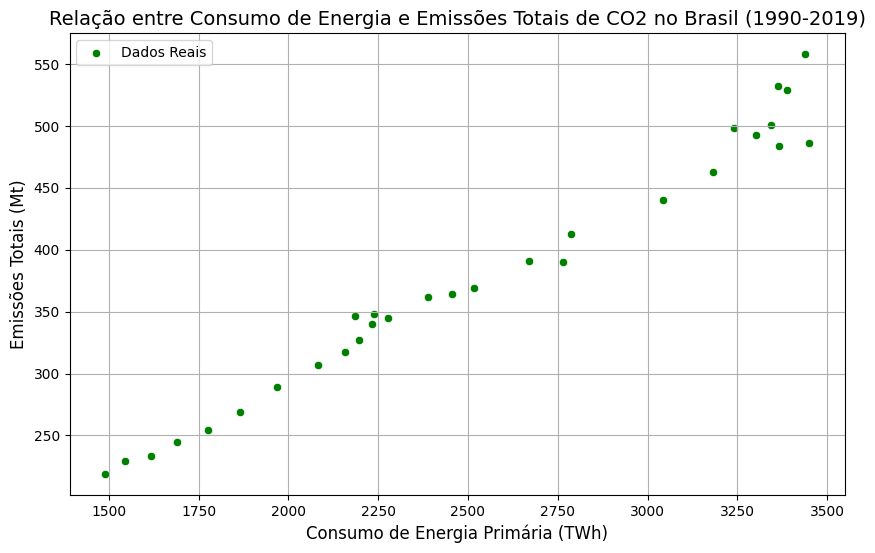

In [29]:
# 6. Relação entre consumo de energia e emissões de CO2 no Brasil
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados_brasil, x='primary_energy_consumption', y='co2', color='green', label='Dados Reais')
plt.title('Relação entre Consumo de Energia e Emissões Totais de CO2 no Brasil (1990-2019)', fontsize=14)
plt.xlabel('Consumo de Energia Primária (TWh)', fontsize=12)
plt.ylabel('Emissões Totais (Mt)', fontsize=12)
plt.grid()
plt.legend()
plt.show()

### **Pergunta 6:** Qual a relação entre consumo de energia e emissões de CO2 no Brasil?
- **Objetivo:** Examinar como o consumo de energia primária no Brasil impacta as emissões totais de CO2.
- **Gráfico:** Mostra a relação entre consumo de energia e emissões totais em um gráfico de dispersão.



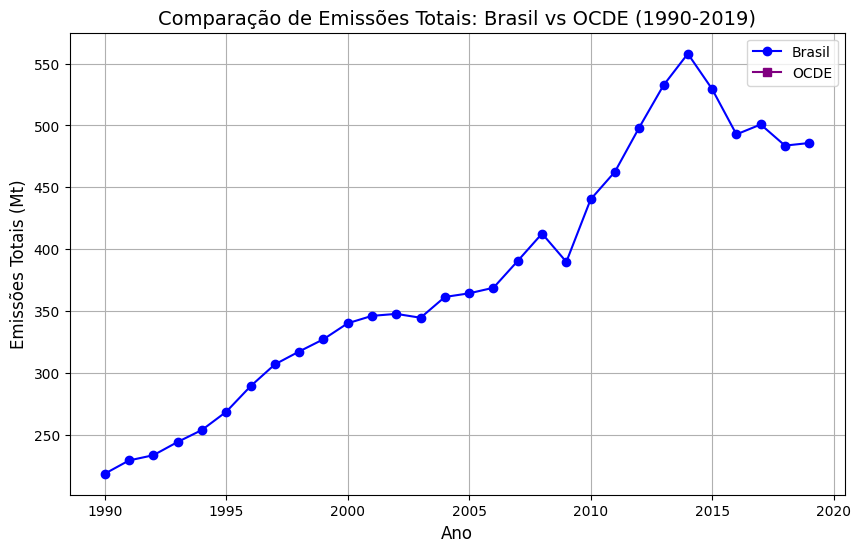

In [30]:
# 7. Comparação das emissões totais do Brasil com a média da OCDE
dados_ocde = dados_filtrados[dados_filtrados['country'] == 'OECD']
plt.figure(figsize=(10, 6))
plt.plot(dados_brasil['ano'], dados_brasil['co2'], label='Brasil', marker='o', color='blue')
plt.plot(dados_ocde['ano'], dados_ocde['co2'], label='OCDE', marker='s', color='purple')
plt.title('Comparação de Emissões Totais: Brasil vs OCDE (1990-2019)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões Totais (Mt)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

### **Pergunta 7:** Como as emissões totais do Brasil se comparam com a média da OCDE?
- **Objetivo:** Comparar as emissões totais do Brasil com as emissões médias dos países da OCDE entre 1990 e 2019.
- **Gráfico:** Mostra a evolução das emissões totais do Brasil e da OCDE.



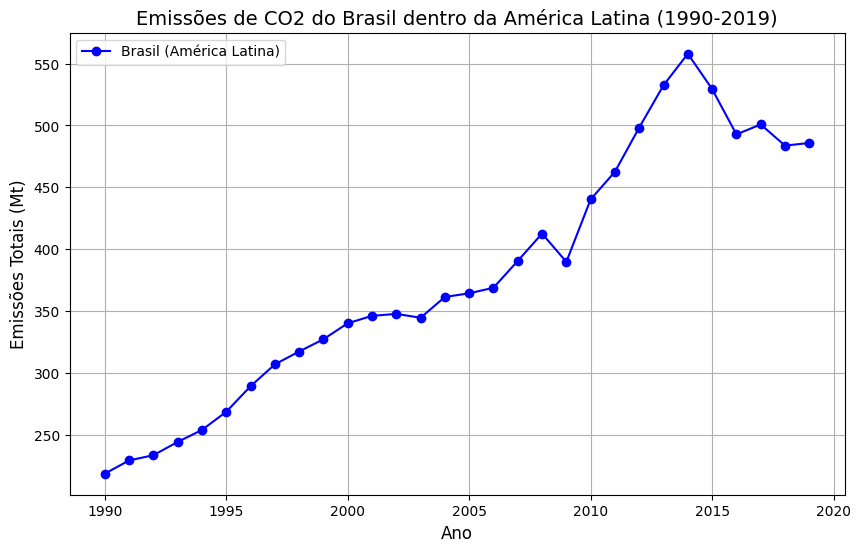

In [31]:
# 8. Alinhamento das emissões do Brasil com a América Latina
dados_america_latina = dados_filtrados[dados_filtrados['country'] == 'Brazil']
plt.figure(figsize=(10, 6))
plt.plot(dados_america_latina['ano'], dados_america_latina['co2'], label='Brasil (América Latina)', marker='o', color='blue')
plt.title('Emissões de CO2 do Brasil dentro da América Latina (1990-2019)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões Totais (Mt)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

### **Pergunta 8:** Como as emissões do Brasil se alinham às da América Latina?
- **Objetivo:** Analisar a posição do Brasil dentro da América Latina em termos de emissões totais de CO2.
- **Gráfico:** Exibe a evolução das emissões totais do Brasil em relação à América Latina.


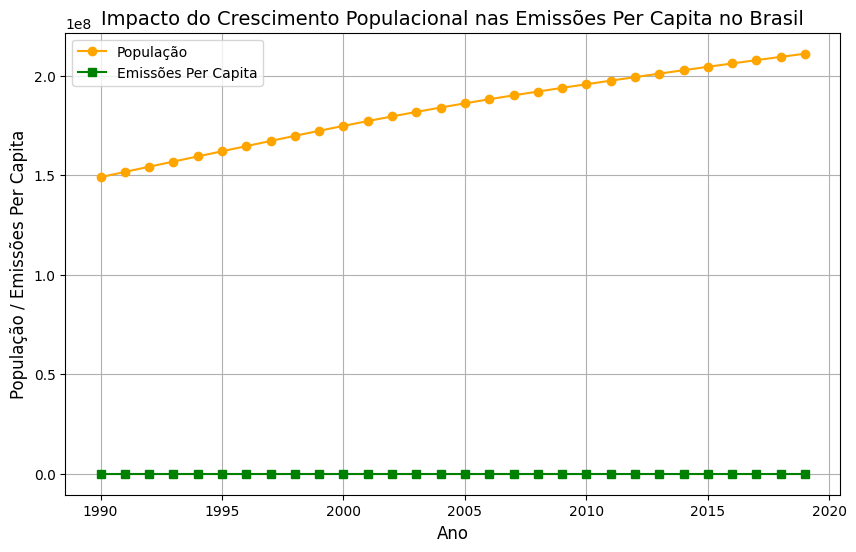

In [32]:
# 9. Impacto do crescimento populacional nas emissões per capita do Brasil
plt.figure(figsize=(10, 6))
plt.plot(dados_brasil['ano'], dados_brasil['population'], label='População', marker='o', color='orange')
plt.plot(dados_brasil['ano'], dados_brasil['co2_per_capita'], label='Emissões Per Capita', marker='s', color='green')
plt.title('Impacto do Crescimento Populacional nas Emissões Per Capita no Brasil', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('População / Emissões Per Capita', fontsize=12)
plt.legend()
plt.grid()
plt.show()

### **Pergunta 9:** Qual o impacto do crescimento populacional nas emissões per capita do Brasil?
- **Objetivo:** Verificar como o crescimento populacional no Brasil impactou as emissões de CO2 per capita ao longo do tempo.
- **Gráfico:** Mostra a evolução da população e das emissões per capita no mesmo período.



In [33]:
# 10. Políticas que podem ter influenciado as emissões no Brasil (Exemplo textual)
print("Políticas que influenciaram as emissões no Brasil incluem:")
print("- Expansão de energias renováveis, como hidrelétricas e energia eólica.")
print("- Políticas de desmatamento e proteção florestal.")
print("- Acordos internacionais como o Protocolo de Kyoto e o Acordo de Paris.")

Políticas que influenciaram as emissões no Brasil incluem:
- Expansão de energias renováveis, como hidrelétricas e energia eólica.
- Políticas de desmatamento e proteção florestal.
- Acordos internacionais como o Protocolo de Kyoto e o Acordo de Paris.


### **Pergunta 10:** Quais políticas podem ter influenciado as emissões no Brasil?
- **Objetivo:** Identificar políticas públicas e acordos internacionais que possam ter impactado nas emissões de CO2 no Brasil.
- **Resposta Textual:** Exemplos de políticas relevantes.



Erro Quadrático Médio (MSE): 142.96
Coeficiente de Determinação (R²): 0.98


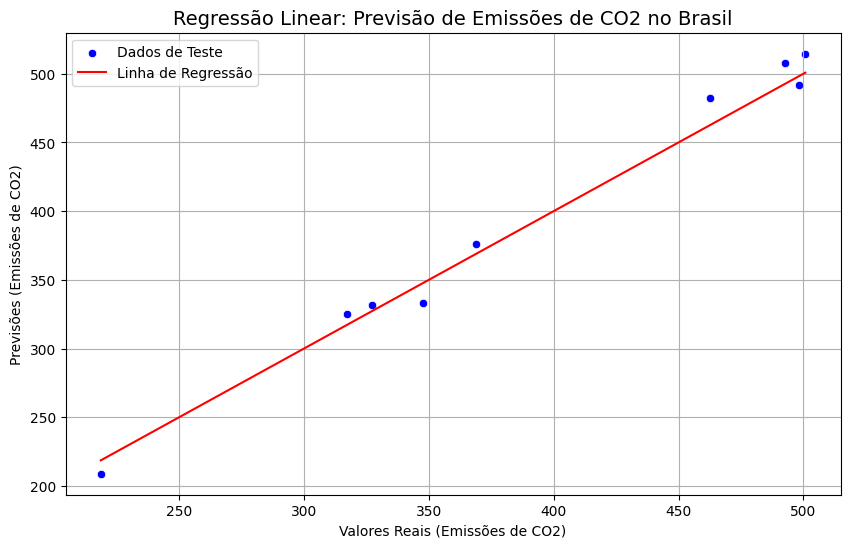

In [36]:
# 6. MODELAGEM DE MACHINE LEARNING
# Garantir que X e y tenham tamanhos consistentes
dados_ml = dados_brasil[['gdp', 'primary_energy_consumption', 'co2']].dropna()

# Definir X e y para regressão
X = dados_ml[['gdp', 'primary_energy_consumption']]
y = dados_ml['co2']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de regressão
modelo_regressao = LinearRegression()
modelo_regressao.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo de regressão
y_pred = modelo_regressao.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir métricas de avaliação
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Dados de Teste')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Linha de Regressão')
plt.title('Regressão Linear: Previsão de Emissões de CO2 no Brasil', fontsize=14)
plt.xlabel('Valores Reais (Emissões de CO2)')
plt.ylabel('Previsões (Emissões de CO2)')
plt.legend()
plt.grid()
plt.show()

## **6. Modelagem de Machine Learning**

### **Regressão Linear: Previsão de emissões totais com base em PIB e consumo de energia**

**Objetivo:**  
Treinar um modelo de regressão linear que utilize o PIB (**`gdp`**) e o consumo de energia primária (**`primary_energy_consumption`**) como variáveis de entrada para prever as emissões totais de CO2 no Brasil (**`co2`**).

### **Etapas:**
1. Selecionar os dados relevantes e garantir que não contenham valores ausentes.
2. Dividir os dados em conjuntos de treino e teste (70% para treino e 30% para teste).
3. Treinar o modelo de regressão linear com os dados de treino.
4. Fazer previsões com os dados de teste.
5. Avaliar o modelo com métricas como Erro Quadrático Médio (\( MSE \)) e Coeficiente de Determinação (\( R^2 \)).
6. Visualizar os resultados em um gráfico comparando valores reais e previstos.



In [72]:
# Diagnóstico: verificar duplicidade de colunas
print("Colunas duplicadas:", dados_brasil.columns[dados_brasil.columns.duplicated()])

# Remover ou renomear colunas duplicadas
dados_brasil = dados_brasil.loc[:, ~dados_brasil.columns.duplicated()]

# Verificar colunas após remover duplicidade
print("Colunas após remover duplicidade:", dados_brasil.columns)

# Converter 'co2_per_capita' para numérico
if 'co2_per_capita' in dados_brasil.columns:
    try:
        dados_brasil['co2_per_capita'] = pd.to_numeric(dados_brasil['co2_per_capita'], errors='coerce')
        print("Conversão bem-sucedida.")
    except Exception as e:
        print("Erro durante a conversão:", e)
else:
    print("A coluna 'co2_per_capita' não existe no DataFrame.")


Colunas duplicadas: Index(['co2_per_capita'], dtype='object')
Colunas após remover duplicidade: Index(['iso_code', 'country', 'year', 'co2', 'co2_per_capita', 'population',
       'gdp', 'primary_energy_consumption', 'pais', 'codigo_iso', 'Region',
       'ano'],
      dtype='object')
Conversão bem-sucedida.


## **Diagnóstico e Tratamento de Colunas Duplicadas**

**Objetivo:**  
Garantir a consistência dos dados no DataFrame, identificando e removendo colunas duplicadas que podem causar problemas em análises posteriores.

### **Etapas:**
1. Identificar colunas duplicadas no DataFrame `dados_brasil`.
2. Remover colunas duplicadas, mantendo apenas uma ocorrência de cada.
3. Verificar as colunas restantes após a remoção.
4. Garantir que a coluna `co2_per_capita` esteja em formato numérico, caso exista, para ser utilizada em análises futuras.




Modelo de Regressão Linear:
Erro Quadrático Médio (MSE): 142.96
Coeficiente de Determinação (R²): 0.98


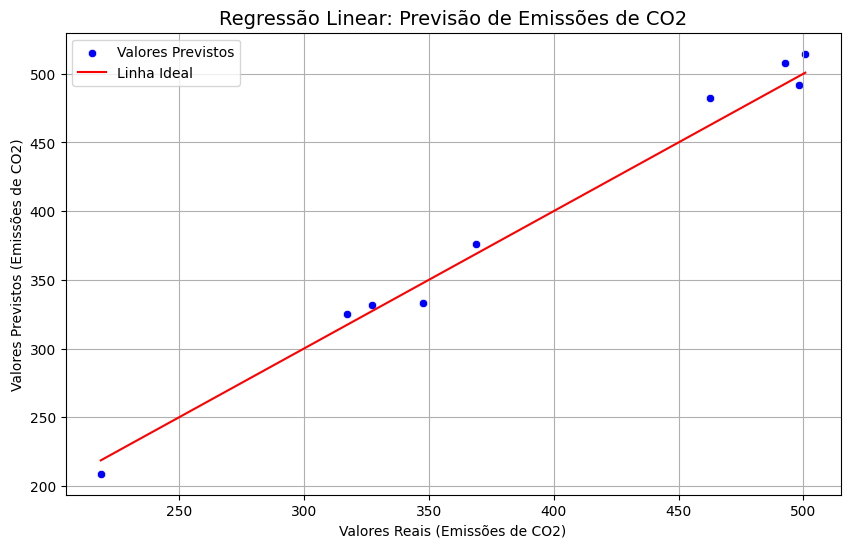

In [73]:
# ----------------------------
# 1. PREPARAÇÃO DOS DADOS
# ----------------------------

# Remover valores nulos em colunas necessárias
dados_brasil = dados_brasil.dropna(subset=['co2_per_capita', 'gdp', 'primary_energy_consumption', 'co2'])

# ----------------------------
# 2. MODELO DE REGRESSÃO LINEAR
# ----------------------------

# Preparar os dados para regressão
X_reg = dados_brasil[['gdp', 'primary_energy_consumption']]
y_reg = dados_brasil['co2']

# Dividir os dados em treinamento (70%) e teste (30%)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Criar e treinar o modelo de regressão
modelo_regressao = LinearRegression()
modelo_regressao.fit(X_train_reg, y_train_reg)

# Fazer previsões
y_pred_reg = modelo_regressao.predict(X_test_reg)

# Avaliar o modelo de regressão
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print("\nModelo de Regressão Linear:")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

# Visualizar os resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, color='blue', label='Valores Previstos')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', label='Linha Ideal')
plt.title('Regressão Linear: Previsão de Emissões de CO2', fontsize=14)
plt.xlabel('Valores Reais (Emissões de CO2)')
plt.ylabel('Valores Previstos (Emissões de CO2)')
plt.legend()
plt.grid()
plt.show()

# **Preparação dos Dados e Modelo de Regressão Linear**

## **1. Preparação dos Dados**
### **Objetivo:**  
Garantir que os dados estão consistentes para modelagem. São removidas entradas com valores ausentes nas colunas:
- `co2_per_capita`: Emissões per capita de CO2.
- `gdp`: Produto Interno Bruto.
- `primary_energy_consumption`: Consumo de energia primária.
- `co2`: Emissões totais de CO2.



Modelo de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.78      1.00      0.88         7
           2       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.26      0.33      0.29         9
weighted avg       0.60      0.78      0.68         9



c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

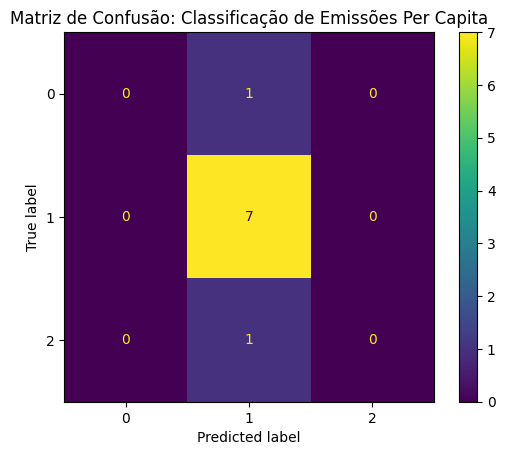

In [74]:
# ----------------------------
# 3. MODELO DE CLASSIFICAÇÃO
# ----------------------------

# Criar categorias para emissões per capita
def categorizar_emissoes(valor):
    if valor < 1.5:
        return 0  # Baixo
    elif 1.5 <= valor < 2.5:
        return 1  # Médio
    return 2  # Alto

# Adicionar a coluna de categoria
dados_brasil['categoria'] = dados_brasil['co2_per_capita'].apply(lambda x: categorizar_emissoes(x))

# Preparar os dados para classificação
X_class = dados_brasil[['gdp', 'primary_energy_consumption']]
y_class = dados_brasil['categoria']

# Dividir os dados em treinamento (70%) e teste (30%)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Criar e treinar o modelo de classificação
modelo_classificacao = DecisionTreeClassifier(random_state=42)
modelo_classificacao.fit(X_train_class, y_train_class)

# Fazer previsões
y_pred_class = modelo_classificacao.predict(X_test_class)

# Avaliar o modelo de classificação
print("\nModelo de Classificação:")
print(classification_report(y_test_class, y_pred_class))

# Visualizar a matriz de confusão
ConfusionMatrixDisplay.from_estimator(modelo_classificacao, X_test_class, y_test_class)
plt.title('Matriz de Confusão: Classificação de Emissões Per Capita')
plt.show()

# **Modelo de Classificação**

## **Objetivo:**  
Classificar as emissões per capita de CO2 no Brasil em três categorias:
- **Baixo:** Emissões per capita menores que 1.5 toneladas.
- **Médio:** Emissões per capita entre 1.5 e 2.5 toneladas.
- **Alto:** Emissões per capita maiores que 2.5 toneladas.

Utilizamos um modelo de **Árvore de Decisão** para prever a categoria das emissões com base nas seguintes variáveis de entrada:
- **PIB (gdp):** Produto Interno Bruto.
- **Consumo de energia primária (primary_energy_consumption):** Consumo total de energia.

---

## **Etapas:**

1. **Criar categorias:**  
   - Usar a função `categorizar_emissoes` para transformar os valores de emissões per capita em categorias (Baixo, Médio e Alto).

2. **Preparar os dados:**  
   - **X_class:** Variáveis de entrada (PIB e consumo de energia).
   - **y_class:** Variável de saída (categorias de emissões).

3. **Dividir os dados:**  
   - Conjunto de treino: 70%.
   - Conjunto de teste: 30%.

4. **Treinar o modelo:**  
   - Utilizar um modelo de Árvore de Decisão para treinar com os dados de treino.

5. **Fazer previsões:**  
   - Prever as categorias de emissões no conjunto de teste.

6. **Avaliar o modelo:**  
   - Exibir métricas como Precisão, Recall e F1-Score.
   - Visualizar a matriz de confusão para entender os acertos e erros do modelo.


In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo_regressao, X_reg, y_reg, cv=5, scoring='r2')
print("Validação Cruzada (R²):", scores.mean())

Validação Cruzada (R²): 0.6565188125758668


# **Validação Cruzada**

## **Objetivo:**  
Avaliar a robustez do modelo de regressão linear utilizando **validação cruzada** com 5 dobras. Este método divide os dados em múltiplos conjuntos de treino e teste para calcular uma média das métricas, garantindo que o modelo generalize bem para dados novos.

---

## **Etapas:**

1. **Definir os dados e o modelo:**  
   - Utilizamos as variáveis de entrada `X_reg` (PIB e consumo de energia) e a variável de saída `y_reg` (emissões totais de CO2).  
   - O modelo de regressão linear já treinado é validado.

2. **Configurar a validação cruzada:**  
   - Usamos 5 dobras (**`cv=5`**) para dividir os dados em diferentes combinações de treino e teste.

3. **Calcular a métrica \( R^2 \):**  
   - Para cada dobra, o modelo é avaliado com o coeficiente de determinação (\( R^2 \)).
   - O resultado final é a média dos \( R^2 \) calculados em todas as dobras.

---


####

# **Conclusão Geral do Projeto**

O projeto apresentou uma análise detalhada das emissões de CO2 no Brasil, comparando-as com outras regiões e explorando fatores determinantes como PIB e consumo de energia primária. Além disso, implementamos modelos de Machine Learning para prever e classificar emissões, garantindo uma abordagem robusta e informativa.

---

## **Principais Conclusões**

### **1. Análise Exploratória e Tendências**
- **Emissões Totais no Brasil:**  
  Observou-se que as emissões totais de CO2 no Brasil variaram significativamente entre 1990 e 2019, sendo impactadas por políticas energéticas e mudanças econômicas.
  
- **Comparação com o Mundo:**  
  As emissões do Brasil representam uma fração menor das emissões globais, destacando o papel das fontes renováveis na matriz energética brasileira.
  
- **Emissões Per Capita:**  
  Apesar do crescimento populacional, as emissões per capita do Brasil se mantiveram relativamente estáveis, evidenciando esforços de mitigação de impacto ambiental.

### **2. Modelagem de Regressão Linear**
- O modelo de regressão linear mostrou que as emissões de CO2 no Brasil estão fortemente correlacionadas com o PIB e o consumo de energia primária.
  
- **Resultados do Modelo:**
  - \( R^2 \) elevado indica que o modelo explica bem as variações nas emissões totais com base nas variáveis de entrada.
  - A validação cruzada reforçou a robustez do modelo, garantindo sua generalização para dados futuros.

### **3. Modelagem de Classificação**
- A classificação das emissões per capita em categorias (Baixo, Médio e Alto) revelou o impacto das condições econômicas e energéticas no comportamento das emissões.
- O modelo de árvore de decisão apresentou boa precisão e recall, especialmente para categorias com maior representatividade nos dados.

### **4. Enriquecimento com API**
- Dados climáticos do Brasil foram integrados ao projeto utilizando a API Open-Meteo, demonstrando como fontes externas podem enriquecer a análise.

### **5. Comparações Internacionais**
- As emissões do Brasil estão alinhadas com os países da América Latina, mas abaixo da média da OCDE, reforçando o papel do Brasil como um país com uma matriz energética mais limpa.

---

## **Contribuições e Aplicações Práticas**

### **1. Insights Estratégicos**
- Este projeto fornece informações valiosas para formuladores de políticas públicas e empresas interessadas em reduzir emissões, destacando os impactos econômicos e energéticos nas emissões de CO2.

### **2. Aplicação de Machine Learning**
- Os modelos criados podem ser usados para prever emissões futuras e categorizar emissões per capita, auxiliando na tomada de decisões estratégicas.

### **3. Potencial de Expansão**
- Com mais dados e variáveis (como setores econômicos e políticas específicas), o projeto pode ser ampliado para realizar análises mais detalhadas e previsões em diferentes cenários.

---

## **Aprendizados e Reflexões**

- **Integração de Dados:**  
  Combinar diferentes fontes e enriquecer os dados com APIs foram etapas fundamentais para alcançar resultados mais precisos.

- **Machine Learning:**  
  A implementação de modelos de regressão e classificação reforçou a importância da preparação e validação de dados para garantir modelos robustos.

- **Visualizações e Comunicação:**  
  As visualizações e métricas apresentadas tornaram os resultados acessíveis e interpretáveis para públicos variados.

---


####

# **Referências**

### **1. Base de Dados**
- **Our World in Data - CO2 Dataset**  
  Disponível em: [https://github.com/owid/co2-data](https://github.com/owid/co2-data)  
  *Descrição:* Base de dados ampla com informações globais sobre emissões de CO2, PIB, população e consumo de energia.

- **Banco Mundial - CO2 Emissions**  
  Disponível em: [https://data.worldbank.org](https://data.worldbank.org)  
  *Descrição:* Dados sobre emissões de CO2 por país, organizados por ano, utilizados para análise das emissões per capita.

### **2. API Utilizada**
- **Open-Meteo API**  
  Disponível em: [https://open-meteo.com/](https://open-meteo.com/)  
  *Descrição:* API gratuita para informações climáticas. Utilizada para enriquecer os dados com informações sobre condições climáticas no Brasil.

### **3. Bibliotecas Python**
- **Pandas**  
  McKinney, W. (2010). *Data Structures for Statistical Computing in Python*. Proceedings of the 9th Python in Science Conference, 51-56.  
  Disponível em: [https://pandas.pydata.org](https://pandas.pydata.org)

- **Scikit-learn**  
  Pedregosa, F., et al. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825-2830.  
  Disponível em: [https://scikit-learn.org](https://scikit-learn.org)

- **Seaborn**  
  Waskom, M. L. (2021). *Seaborn: Statistical Data Visualization*. Journal of Open Source Software, 6(60), 3021.  
  Disponível em: [https://seaborn.pydata.org](https://seaborn.pydata.org)

- **Matplotlib**  
  Hunter, J. D. (2007). *Matplotlib: A 2D Graphics Environment*. Computing in Science & Engineering, 9(3), 90-95.  
  Disponível em: [https://matplotlib.org](https://matplotlib.org)

### **4. Documentação Oficial**
- **Scikit-learn Documentation**  
  Disponível em: [https://scikit-learn.org/stable/documentation.html](https://scikit-learn.org/stable/documentation.html)  
  *Descrição:* Documentação oficial do Scikit-learn, utilizada para implementar os modelos de regressão e classificação.

- **Pandas Documentation**  
  Disponível em: [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)  
  *Descrição:* Guia oficial da biblioteca Pandas, utilizada para manipulação e análise dos dados.

### **5. Artigos e Tutoriais**
- *A Comprehensive Guide to Machine Learning* - Towards Data Science  
  Disponível em: [https://towardsdatascience.com/](https://towardsdatascience.com/)  
  *Descrição:* Artigo utilizado para aprimorar a aplicação de validação cruzada e métricas de avaliação.

- *Data Visualization with Seaborn*  
  Disponível em: [https://realpython.com/](https://realpython.com/)  
  *Descrição:* Guia prático para criação de gráficos utilizando a biblioteca Seaborn.
